<a href="https://colab.research.google.com/github/IsiVG/ThinkStats2/blob/master/Clase1_ECD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Lo primero que hago es copiar el código
!git clone https://github.com/AllenDowney/ThinkStats2.git

Cloning into 'ThinkStats2'...
remote: Enumerating objects: 3314, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 3314 (delta 40), reused 55 (delta 21), pack-reused 3229
Receiving objects: 100% (3314/3314), 180.14 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (1911/1911), done.
Updating files: 100% (489/489), done.


In [21]:
## Segundo lo que tengo que hacer es descargar los script ( son archivos de texto que contienen código escrito en un lenguaje de programación)

from os.path import basename, exists
def download(url):
 filename = basename(url)
 from urllib.request import urlretrieve
 local, _ = urlretrieve(url, filename)
 print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [22]:
## Descargo ahora las bases de datos
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [23]:
## Ahora importo el notebook (Importo el módulo 'nsfg'que contiene funciones y datos específicos para el análisis de encuestas de natalidad)
import nsfg

In [24]:
## Ahora generamos nuestro  primer data frame (Estructura de datos bidimensional que se utiliza para almacenar datos en formato de tabla)
preg = nsfg.ReadFemPreg()

In [25]:
#Lo siguiente nos mostrará el encabezado de nuestro dataframe preg.
preg.head()


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [26]:
#Nombre de columnas.
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [28]:
pregordr = preg['pregordr']
## El código toma la columna 'pregordr' del DataFrame preg y la asigna a la variable pregordr.
## Es la primera columna
pregordr

## Los índices son enteros de 0 a 13592 (en general pueden ser de cualquier tipo ordenable).
## La última línea incluye el nombre de la variable, el largo de la serie y el tipo de dato; int64 está dado por NumPy.

,pregordr
0,1
1,2
2,1
3,2
4,3
...,...
13588,1
13589,2
13590,3
13591,4


In [36]:
## Ahora se hace una limpieza de datos, el módulo nsfg incluye una función para limpiar datos:
#Esta función recibe un dataframe como input.

def CleanFemPreg(df):
 df.agepreg /= 100.0
 na_vals = [97, 98, 99]
 df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
 df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
 df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0

 ## Con esto ultimo, deje todos lo pesos libras y en una columna

In [37]:
## Con este comnado quise ver la columna con las edades da las madres
agepreg = preg['agepreg']
agepreg


,agepreg
0,33.16
1,39.25
2,14.33
3,17.83
4,18.33
...,...
13588,17.91
13589,18.50
13590,19.75
13591,21.58


In [38]:
## Una buena forma de describir una variable es contar cuántas veces aparece en el dataset y valores representan. A esta descripción se le llama distribución. La manera más común para
## Una forma de representar una distribución es con un histograma.

#Creación de un histograma.
t=[1,2,3,4,5]
hist = {}
for x in t:
 hist[x] = hist.get(x, 0) + 1


In [39]:
## Para representar histogramas podemos hacer lo siguiente:
import thinkstats2
import thinkplot
import nsfg
import numpy as np

In [40]:
#Representación
hist = thinkstats2.Hist([1, 2, 2, 3, 5,2,1,0,3,2,1,2,3,4,5,2,2,2,2])
hist

Hist({1: 3, 2: 9, 3: 3, 5: 2, 0: 1, 4: 1})

In [43]:
#Imprimimos los valores
hist.Values()

dict_keys([1, 2, 3, 5, 0, 4])

In [44]:
#Ordenamos los valores
for val in sorted(hist.Values()):
 print(val, hist.Freq(val))

0 1
1 3
2 9
3 3
4 1
5 2


In [45]:
#Iteramos sobre los pares valores-frecuencia
for val, freq in hist.Items():
 print(val, freq)

1 3
2 9
3 3
5 2
0 1
4 1


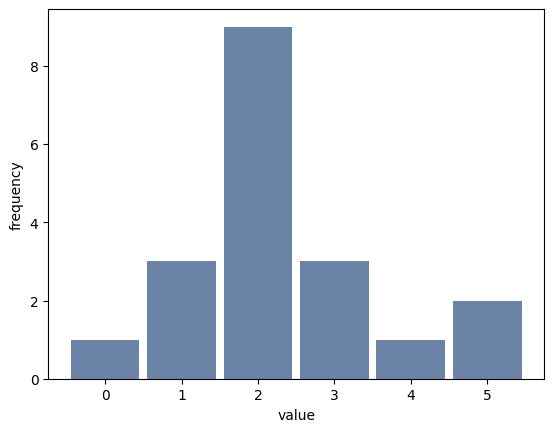

<Figure size 800x600 with 0 Axes>

In [46]:
#Ploteemos un histograma
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

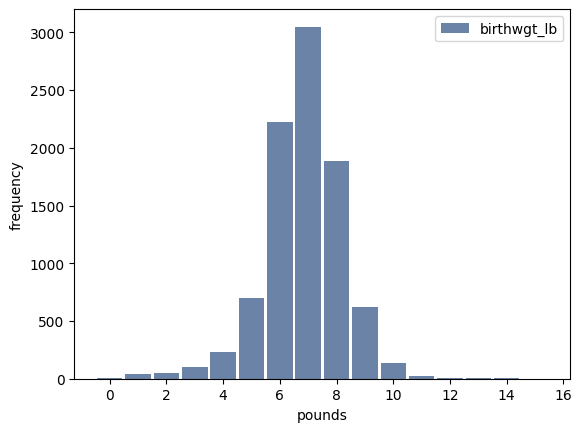

<Figure size 800x600 with 0 Axes>

In [47]:
#Leamos los datos y seleccionemos los nacimientos.

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

#Ploteamos el histograma de los pesos en libras.
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

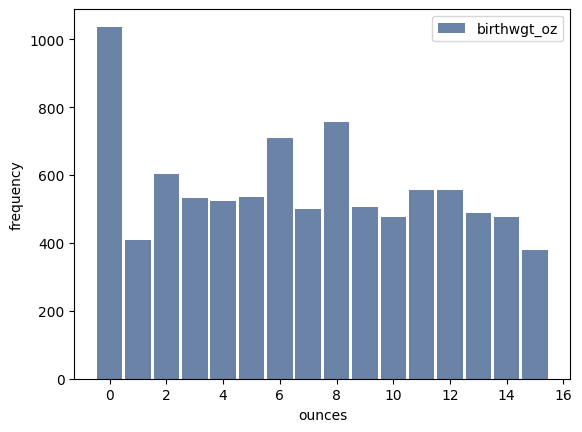

<Figure size 800x600 with 0 Axes>

In [48]:
## Código 1.
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='ounces', ylabel='frequency')

## Me entrega un histograma con los pesos en onzas y sus frecuencias


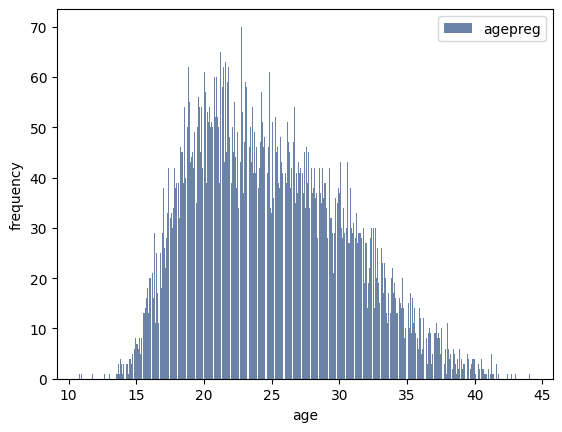

<Figure size 800x600 with 0 Axes>

In [49]:
## Código 2
hist = thinkstats2.Hist(live.agepreg, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='age', ylabel='frequency')

## Me entrega la edad de la madre al final del embarazo
